Importing Libraries

In [32]:
import h5py
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from sklearn.metrics._classification import classification_report
import seaborn as sns
from keras.applications.inception_v3 import preprocess_input
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import pandas as pd
my_model = load_model('model_inception.h5')

In [2]:
my_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

Predicting the model

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

testdatadirectory = ImageDataGenerator(rescale=1./255)
testdata = testdatadirectory.flow_from_directory(directory="D:/Salman/Tomato_Dataset/PlantVillage/Test_&_Train/val",
                                      target_size=(224,224),
                                      batch_size=32,
                                      class_mode='categorical',
                                      color_mode='rgb',
                                      shuffle=True)

Found 3207 images belonging to 10 classes.


In [4]:
results = my_model.evaluate(testdata,verbose=0)
print("test loss, test acc:", results)

test loss, test acc: [1.5814228057861328, 0.9011537432670593]


In [34]:
pred = my_model.predict(testdata)

In [35]:
pred_array = np.array(pred)

In [36]:
get_results = pred_array.argmax(axis=1)
get_results

array([4, 2, 7, ..., 9, 1, 7], dtype=int64)

Displaying 1st FIVE test images
Disease: Bacterial spot


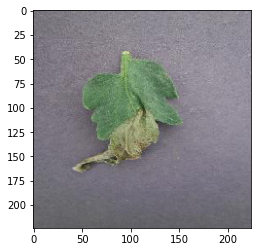

Diseae: Tomato_Yellow_Leaf_Curl_Virus


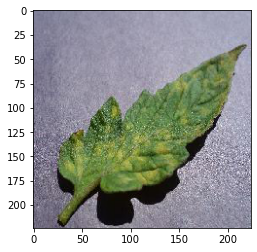

Disease: Target_Spot


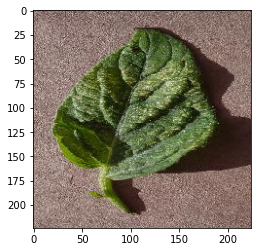

Disease: Target_Spot


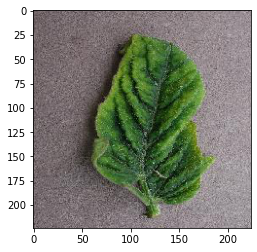

Disease: Leaf_Mold


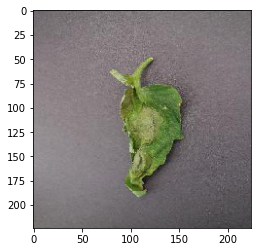

In [41]:
import matplotlib.pyplot as plt
print("Displaying 1st FIVE test images")
for i in range(5):
    img , label = testdata.next()
    if get_results[i]==0:
        print("Disease: Bacterial spot")
    elif get_results[i]==1:
        print("Disease: Early_blight")
    elif get_results[i]==2:
        print("Disease: Late_blight")
    elif get_results[i]==3:
        print("Disease: Leaf_Mold")
    elif get_results[i]==4:
        print("Disease: Septoria_leaf_spot")
    elif get_results[i]==5:
        print("Disease: Spider_mites Two-spotted_spider_mite")
    elif get_results[i]==6:
        print("Disease: Target_Spot")
    elif get_results[i]==7:
        print("Diseae: Tomato_Yellow_Leaf_Curl_Virus")
    elif get_results[i]==8:
        print("Disease: Tomato_mosaic_virus")
    else:
        print("Disease: Healthy")
    plt.imshow(img[i])
    plt.show()

CLASSIFICATION REPORT

In [37]:
#Firstly I have to split the testing datset to images and labels
true_classes = testdata.classes
class_labels = list(testdata.class_indices.keys())
report = classification_report(true_classes, get_results, target_names=class_labels)
print(report)

                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.12      0.12      0.12       426
                        Tomato_Early_blight       0.05      0.04      0.05       200
                         Tomato_Late_blight       0.13      0.14      0.13       382
                           Tomato_Leaf_Mold       0.06      0.05      0.05       191
                  Tomato_Septoria_leaf_spot       0.11      0.11      0.11       355
Tomato_Spider_mites_Two_spotted_spider_mite       0.08      0.11      0.09       336
                        Tomato__Target_Spot       0.06      0.05      0.06       281
      Tomato__Tomato_YellowLeaf__Curl_Virus       0.22      0.20      0.21       642
                Tomato__Tomato_mosaic_virus       0.03      0.04      0.03        75
                             Tomato_healthy       0.12      0.12      0.12       319

                                   accuracy                    

CONFUSION MATRIX

CONFUSION MATRIX = 
 [[ 53  20  51  24  46  74  34  72  12  40]
 [ 32   8  36   3  20  22  14  42   4  19]
 [ 55  13  53  15  48  52  28  56  12  50]
 [ 27  10  20   9  29  33  19  29   4  11]
 [ 42  13  59  19  40  53  24  62  12  31]
 [ 49  19  36  21  31  37  29  64  17  33]
 [ 45  18  39   6  23  39  15  61   8  27]
 [ 87  35  69  37  66  81  47 129  20  71]
 [  8   4   6   4  10   9   6  18   3   7]
 [ 36  12  44  12  41  48  17  65   5  39]]


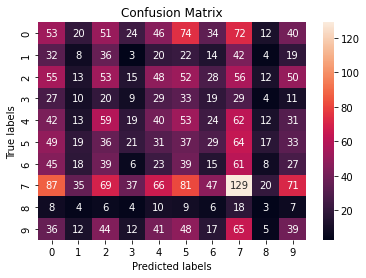

In [47]:
cn_matrix = confusion_matrix(true_classes,get_results)
print("CONFUSION MATRIX = \n",cn_matrix)
graph=plt.subplot()
sns.heatmap(cn_matrix, annot=True,fmt='g')
graph.set_xlabel('Predicted labels');graph.set_ylabel('True labels'); 
graph.set_title('Confusion Matrix'); 


In [26]:
#Now predicting the model on 1 image
pic_loaded = image.load_img('D:/Salman/Tomato_Dataset/target_spot.jpg',target_size=(224,224))
pic = image.img_to_array(pic_loaded)
print(pic.shape)

(224, 224, 3)


In [27]:
#Now making this image compatible to load into the model
pic = np.expand_dims(pic,axis=0)
img_data=preprocess_input(pic)
img_data.shape

(1, 224, 224, 3)

In [28]:
#Now predict the model
img_result= my_model.predict(img_data)
print(img_result)

[[0.0000000e+00 0.0000000e+00 2.2873460e-34 0.0000000e+00 6.3771167e-30
  8.4535412e-35 9.9999404e-01 0.0000000e+00 0.0000000e+00 5.9243694e-06]]


In [29]:
#Now displaying the result
#1st convert to array 
#Then take argmax
result_array = np.array(img_result)
result_argmax = result_array.argmax(axis=1)
result_argmax

array([6], dtype=int64)

Disease: Target_Spot


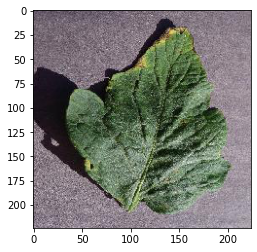

In [30]:
if result_argmax==0:
        print("Disease: Bacterial spot")
elif result_argmax==1:
    print("Disease: Early_blight")
elif result_argmax==2:
    print("Disease: Late_blight")
elif result_argmax==3:
    print("Disease: Leaf_Mold")
elif result_argmax==4:
    print("Disease: Septoria_leaf_spot")
elif result_argmax==5:
    print("Disease: Spider_mites Two-spotted_spider_mite")
elif result_argmax==6:
    print("Disease: Target_Spot")
elif result_argmax==7:
    print("Diseae: Tomato_Yellow_Leaf_Curl_Virus")
elif result_argmax==8:
    print("Disease: Tomato_mosaic_virus")
else:
    print("Disease: Healthy")
plt.imshow(pic_loaded)
plt.show()